In [94]:
import os
import warnings
from utils.decorators import print_runtime
import gymnasium as gym
import pygame
from algorithms.rl import RL
from algorithms.planner import Planner
from examples.test_env import TestEnv
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm
import random
import sys
import itertools
from time import perf_counter
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import pandas as pd
%matplotlib inline

In [2]:
"""
Set up the seed values.
"""
seeds = [234, 235, 236, 237]

def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [3]:
"""
Performing Grid Search to find the best hyperparameters
"""

class GridSearch:
    @staticmethod
    def Value_Iteration_grid_search(P, gamma, threshold, iters):
        max_iter = 0
        max_gamma = 0
        max_threshold = 0
        V_average_max = -sys.maxsize - 1
        for i in itertools.product(gamma, threshold, iters):
            print("running -- with Discount Factor: ", i[0],  " Convergence Criterion: ", i[1],  " Iterations: ", i[2])
            V, V_track, pi = Planner(P).value_iteration(gamma=i[0], n_iters=i[2], theta=i[1])
            # Want to find the max average Value
            V_average = np.average(V)
            print(f"V AVERAGE: {V_average}")
            if V_average > V_average_max:
                V_average_max = V_average
                max_gamma = i[0]
                max_threshold = i[1]
                max_iter = i[2]
        print("Best params: Discount Factor: ", max_gamma,  " Convergence Criterion: ", max_threshold,  " Iterations: ", max_iter)       
            
    @staticmethod
    def Policy_Iteration_grid_search(P, gamma, threshold, iters):
        max_iter = 0
        max_gamma = 0
        max_threshold = 0
        V_average_max = -sys.maxsize - 1
        for i in itertools.product(gamma, threshold, iters):
            print("running -- with Discount Factor: ", i[0],  " Convergence Criterion: ", i[1],  " Iterations: ", i[2])
            V, V_track, pi = Planner(P).policy_iteration(gamma=i[0], n_iters=i[2], theta=i[1])
            # Want to find the max average Value
            V_average = np.average(V)
            print(f"V AVERAGE: {V_average}")
            if V_average > V_average_max:
                V_average_max = V_average
                max_gamma = i[0]
                max_threshold = i[1]
                max_iter = i[2]
        print("Best params: Discount Factor: ", max_gamma,  " Convergence Criterion: ", max_threshold,  " Iterations: ", max_iter)       
    
    @staticmethod
    def Q_learning_grid_search(env, epsilon_decay, iters):
        for i in itertools.product(epsilon_decay, iters):
            print("running -- with epsilon decay: ", i[0],  " iterations: ", i[1])
            Q, V, pi, Q_track, pi_track = RL(env).q_learning(epsilon_decay_ratio=i[0], n_episodes=i[1])

In [20]:
# Parameters to environment
is_slippery = True
map_size = 20
proba_frozen = 0.45

seed_everything(seeds[0])

frozen_lake_env = gym.make(
    "FrozenLake-v1",
    is_slippery=is_slippery,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=map_size, p=proba_frozen
    ),
)

frozen_lake_env.reset(seed=seeds[0])

(0, {'prob': 1})

In [21]:
frozen_lake_env.observation_space.n

400

In [22]:
"""
Running Grid Search on Value Iteration to find best parameters
"""
gammas = [1.0, 0.5, 0.1, 0.04, 0.01, -0.04, -0.5, -1.0]
iters = [1000, 10000, 50000, 100000, 500000]
thetas = [1e-1, 1e-2, 1e-3, 1e-5, 1e-10]
GridSearch.Value_Iteration_grid_search(frozen_lake_env.env.P, gammas, thetas, iters)

running -- with Discount Factor:  1.0  Convergence Criterion:  0.1  Iterations:  1000
runtime = 0.02 seconds
V AVERAGE: 0.0017592592592592592
running -- with Discount Factor:  1.0  Convergence Criterion:  0.1  Iterations:  10000
runtime = 0.01 seconds
V AVERAGE: 0.0017592592592592592
running -- with Discount Factor:  1.0  Convergence Criterion:  0.1  Iterations:  50000
runtime = 0.01 seconds
V AVERAGE: 0.0017592592592592592
running -- with Discount Factor:  1.0  Convergence Criterion:  0.1  Iterations:  100000
runtime = 0.01 seconds
V AVERAGE: 0.0017592592592592592
running -- with Discount Factor:  1.0  Convergence Criterion:  0.1  Iterations:  500000
runtime = 0.01 seconds
V AVERAGE: 0.0017592592592592592
running -- with Discount Factor:  1.0  Convergence Criterion:  0.01  Iterations:  1000
runtime = 0.02 seconds
V AVERAGE: 0.0027156683432403594
running -- with Discount Factor:  1.0  Convergence Criterion:  0.01  Iterations:  10000
runtime = 0.03 seconds
V AVERAGE: 0.00271566834324035

runtime = 0.01 seconds
V AVERAGE: 0.0008925925925925925
running -- with Discount Factor:  0.1  Convergence Criterion:  0.001  Iterations:  50000
runtime = 0.01 seconds
V AVERAGE: 0.0008925925925925925
running -- with Discount Factor:  0.1  Convergence Criterion:  0.001  Iterations:  100000
runtime = 0.01 seconds
V AVERAGE: 0.0008925925925925925
running -- with Discount Factor:  0.1  Convergence Criterion:  0.001  Iterations:  500000
runtime = 0.01 seconds
V AVERAGE: 0.0008925925925925925
running -- with Discount Factor:  0.1  Convergence Criterion:  1e-05  Iterations:  1000
runtime = 0.01 seconds
V AVERAGE: 0.0008928919753086418
running -- with Discount Factor:  0.1  Convergence Criterion:  1e-05  Iterations:  10000
runtime = 0.01 seconds
V AVERAGE: 0.0008928919753086418
running -- with Discount Factor:  0.1  Convergence Criterion:  1e-05  Iterations:  50000
runtime = 0.01 seconds
V AVERAGE: 0.0008928919753086418
running -- with Discount Factor:  0.1  Convergence Criterion:  1e-05  Ite

runtime = 0.01 seconds
V AVERAGE: 0.00083892620588203
running -- with Discount Factor:  0.01  Convergence Criterion:  1e-10  Iterations:  10000
runtime = 0.01 seconds
V AVERAGE: 0.00083892620588203
running -- with Discount Factor:  0.01  Convergence Criterion:  1e-10  Iterations:  50000
runtime = 0.02 seconds
V AVERAGE: 0.00083892620588203
running -- with Discount Factor:  0.01  Convergence Criterion:  1e-10  Iterations:  100000
runtime = 0.02 seconds
V AVERAGE: 0.00083892620588203
running -- with Discount Factor:  0.01  Convergence Criterion:  1e-10  Iterations:  500000
runtime = 0.01 seconds
V AVERAGE: 0.00083892620588203
running -- with Discount Factor:  -0.04  Convergence Criterion:  0.1  Iterations:  1000
runtime = 0.00 seconds
V AVERAGE: 0.0008333333333333333
running -- with Discount Factor:  -0.04  Convergence Criterion:  0.1  Iterations:  10000
runtime = 0.00 seconds
V AVERAGE: 0.0008333333333333333
running -- with Discount Factor:  -0.04  Convergence Criterion:  0.1  Iteration

In [30]:
"""
From above the best hyperparameters are:
gamma = 0.01
theta = 0.1
n_iters = 1000

Want to perform Value Iteration with these parameters now vs number of iterations.
"""
gamma = 0.5
theta = 1e-10
n_iters_list = [1]
iterations = 100
splits = 500000 / iterations
for i in range(1, iterations + 1):
    n_iters_list.append(int(i * splits))


mean_v_values_vi = []
wall_clock_times_vi = []
    
for n_iters in n_iters_list:
    print(f"Running iteration {n_iters}...")
    t1_start = perf_counter() 
    V, V_track, pi = Planner(frozen_lake_env.P).value_iteration(gamma=gamma, n_iters=n_iters, theta=theta)
    t1_stop = perf_counter()
 
    print("Elapsed time: ", t1_stop - t1_start) 
    average_v = np.average(V)
    print(f"Average V value: {average_v}")
    
    mean_v_values_vi.append(average_v)
    wall_clock_times_vi.append(t1_stop - t1_start)


Running iteration 1...
runtime = 0.00 seconds
Elapsed time:  0.00014075000217417255
Average V value: 0.0
Running iteration 5000...
runtime = 0.06 seconds
Elapsed time:  0.055134292000730056
Average V value: 0.001261763573210387
Running iteration 10000...
runtime = 0.05 seconds
Elapsed time:  0.054374457999074366
Average V value: 0.001261763573210387
Running iteration 15000...
runtime = 0.06 seconds
Elapsed time:  0.05851829200037173
Average V value: 0.001261763573210387
Running iteration 20000...
runtime = 0.06 seconds
Elapsed time:  0.062110750001011183
Average V value: 0.001261763573210387
Running iteration 25000...
runtime = 0.06 seconds
Elapsed time:  0.06429283399847918
Average V value: 0.001261763573210387
Running iteration 30000...
runtime = 0.07 seconds
Elapsed time:  0.06677079200017033
Average V value: 0.001261763573210387
Running iteration 35000...
runtime = 0.07 seconds
Elapsed time:  0.06869645899860188
Average V value: 0.001261763573210387
Running iteration 40000...
runti

runtime = 0.05 seconds
Elapsed time:  0.05399600000237115
Average V value: 0.001261763573210387
Running iteration 350000...
runtime = 0.05 seconds
Elapsed time:  0.05410587500227848
Average V value: 0.001261763573210387
Running iteration 355000...
runtime = 0.05 seconds
Elapsed time:  0.05326170799889951
Average V value: 0.001261763573210387
Running iteration 360000...
runtime = 0.05 seconds
Elapsed time:  0.05269883400251274
Average V value: 0.001261763573210387
Running iteration 365000...
runtime = 0.05 seconds
Elapsed time:  0.053678125001169974
Average V value: 0.001261763573210387
Running iteration 370000...
runtime = 0.05 seconds
Elapsed time:  0.052330582999275066
Average V value: 0.001261763573210387
Running iteration 375000...
runtime = 0.05 seconds
Elapsed time:  0.052358084001753014
Average V value: 0.001261763573210387
Running iteration 380000...
runtime = 0.05 seconds
Elapsed time:  0.05173095799909788
Average V value: 0.001261763573210387
Running iteration 385000...
runti

In [33]:
"""
Running Grid Search on Value Iteration to find best parameters
"""
gammas = [1.0, 0.5, 0.1, 0.04, 0.01, -0.04, -0.5, -1.0]
iters = [1000, 10000, 50000]
thetas = [1e-1, 1e-2]
GridSearch.Policy_Iteration_grid_search(frozen_lake_env.env.P, gammas, thetas, iters)

running -- with Discount Factor:  1.0  Convergence Criterion:  0.1  Iterations:  1000
runtime = 0.59 seconds
V AVERAGE: 0.003126541798619225
running -- with Discount Factor:  1.0  Convergence Criterion:  0.1  Iterations:  10000
runtime = 0.56 seconds
V AVERAGE: 0.0031814224595643407
running -- with Discount Factor:  1.0  Convergence Criterion:  0.1  Iterations:  50000
runtime = 0.52 seconds
V AVERAGE: 0.003126541798619225
running -- with Discount Factor:  1.0  Convergence Criterion:  0.01  Iterations:  1000
runtime = 0.61 seconds
V AVERAGE: 0.0033583284886044775
running -- with Discount Factor:  1.0  Convergence Criterion:  0.01  Iterations:  10000
runtime = 0.54 seconds
V AVERAGE: 0.0032671213795819653
running -- with Discount Factor:  1.0  Convergence Criterion:  0.01  Iterations:  50000
runtime = 0.64 seconds
V AVERAGE: 0.003276118941917911
running -- with Discount Factor:  0.5  Convergence Criterion:  0.1  Iterations:  1000
runtime = 0.59 seconds
V AVERAGE: 0.0012617226718436582
ru

In [36]:
"""
From above the best hyperparameters are:
gamma = 0.01
theta = 0.1
n_iters = 1000

Want to perform Value Iteration with these parameters now vs number of iterations.
"""
gamma = 0.5
theta = 1e-2
n_iters_list = [1]
iterations = 100
splits = 500000 / iterations
for i in range(1, iterations + 1):
    n_iters_list.append(int(i * splits))


mean_v_values_pi = []
wall_clock_times_pi = []
    
for n_iters in n_iters_list:
    print(f"Running iteration {n_iters}...")
    t1_start = perf_counter() 
    V, V_track, pi = Planner(frozen_lake_env.P).policy_iteration(gamma=gamma, n_iters=n_iters, theta=theta)
    t1_stop = perf_counter()
 
    print("Elapsed time: ", t1_stop - t1_start) 
    average_v = np.average(V)
    print(f"Average V value: {average_v}")
    
    mean_v_values_pi.append(average_v)
    wall_clock_times_pi.append(t1_stop - t1_start)


Running iteration 1...
runtime = 0.00 seconds
Elapsed time:  0.0003428750023886096
Average V value: 0.0
Running iteration 5000...
runtime = 0.52 seconds
Elapsed time:  0.5228674999998475
Average V value: 0.0012617044476972456
Running iteration 10000...
runtime = 0.50 seconds
Elapsed time:  0.5012351670011412
Average V value: 0.0012617044476972456
Running iteration 15000...
runtime = 0.50 seconds
Elapsed time:  0.49975116699715727
Average V value: 0.0012617044476972456
Running iteration 20000...
runtime = 0.50 seconds
Elapsed time:  0.5006809999977122
Average V value: 0.0012617044476972456
Running iteration 25000...
runtime = 0.47 seconds
Elapsed time:  0.4680539590008266
Average V value: 0.0012617003227250248
Running iteration 30000...
runtime = 0.48 seconds
Elapsed time:  0.4812104169977829
Average V value: 0.0012617003227250248
Running iteration 35000...
runtime = 0.45 seconds
Elapsed time:  0.45200608400045894
Average V value: 0.0012617044476972456
Running iteration 40000...
runtime

runtime = 0.46 seconds
Elapsed time:  0.4625168330021552
Average V value: 0.0012617044476972456
Running iteration 340000...
runtime = 0.52 seconds
Elapsed time:  0.5232779580001079
Average V value: 0.0012617217249716514
Running iteration 345000...
runtime = 0.50 seconds
Elapsed time:  0.496656167000765
Average V value: 0.0012617044476972456
Running iteration 350000...
runtime = 0.45 seconds
Elapsed time:  0.4450917499998468
Average V value: 0.0012617118852805685
Running iteration 355000...
runtime = 0.52 seconds
Elapsed time:  0.5220212080021156
Average V value: 0.0012617217249716514
Running iteration 360000...
runtime = 0.55 seconds
Elapsed time:  0.5514305830001831
Average V value: 0.0012617408737754102
Running iteration 365000...
runtime = 0.50 seconds
Elapsed time:  0.49620979099927354
Average V value: 0.0012617044476972456
Running iteration 370000...
runtime = 0.50 seconds
Elapsed time:  0.49643033299798844
Average V value: 0.0012617044476972456
Running iteration 375000...
runtime

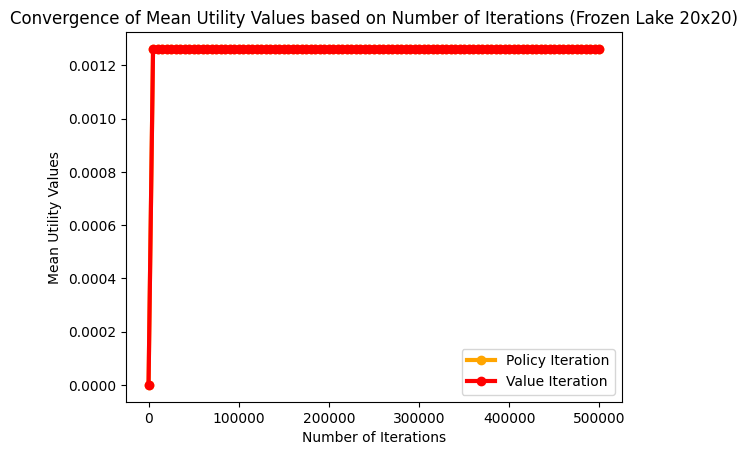

In [37]:
"""
Plotting results of Mean V vs Number of Iterations
"""
# Plotting the validation scores
plt.plot(
    n_iters_list,
    mean_v_values_pi,
    color="orange",
    linewidth=3,
    marker='o',
    label = "Policy Iteration"
)

# Plotting the training scores
plt.plot(
    n_iters_list,
    mean_v_values_vi,
    color="red",
    linewidth=3,
    marker='o',
    label = "Value Iteration"
)



# Naming X-Axis
plt.xlabel('Number of Iterations')
# Naming Y-Axis
plt.ylabel('Mean Utility Values')
# Naming Title
plt.title("Convergence of Mean Utility Values based on Number of Iterations (Frozen Lake 20x20)")

plt.legend()

plt.show()

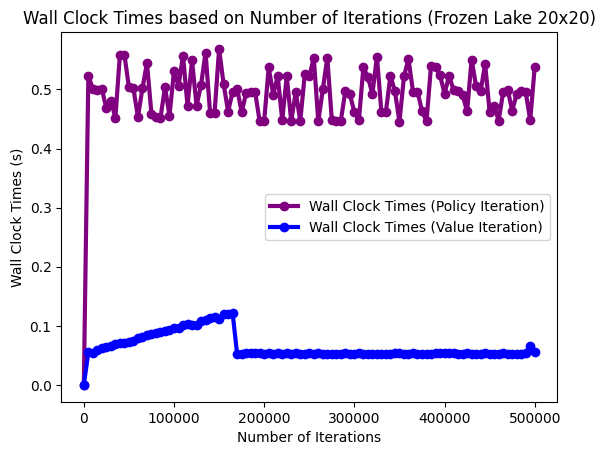

In [38]:
"""
Plotting results of Wall Clock Times
"""
# Plotting the validation scores
plt.plot(
    n_iters_list,
    wall_clock_times_pi,
    color="purple",
    linewidth=3,
    marker='o',
    label = "Wall Clock Times (Policy Iteration)"
)

# Plotting the training scores
plt.plot(
    n_iters_list,
    wall_clock_times_vi,
    color="blue",
    linewidth=3,
    marker='o',
    label = "Wall Clock Times (Value Iteration)"
)



# Naming X-Axis
plt.xlabel('Number of Iterations')
# Naming Y-Axis
plt.ylabel('Wall Clock Times (s)')
# Naming Title
plt.title("Wall Clock Times based on Number of Iterations (Frozen Lake 20x20)")

plt.legend()

plt.show()

In [39]:
# Parameters to environment
is_slippery = True
map_size = 8
proba_frozen = 0.45

seed_everything(seeds[0])

frozen_lake_env_8 = gym.make(
    "FrozenLake-v1",
    is_slippery=is_slippery,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=map_size, p=proba_frozen
    ),
)

frozen_lake_env_8.reset(seed=seeds[0])

(0, {'prob': 1})

In [62]:
"""
From above the best hyperparameters are:
gamma = 0.01
theta = 0.1
n_iters = 1000

Want to perform Value Iteration with these parameters now vs number of iterations.
"""
gamma = 0.5
theta = 1e-10
n_iters_list = [1]
iterations = 10
splits = 500000 / iterations
for i in range(1, iterations + 1):
    n_iters_list.append(int(i * splits))


mean_v_values_vi = []
wall_clock_times_vi = []
    
for n_iters in n_iters_list:
    print(f"Running iteration {n_iters}...")
    t1_start = perf_counter() 
    V, V_track, pi = Planner(frozen_lake_env_8.P).value_iteration(gamma=gamma, n_iters=n_iters, theta=theta)
    t1_stop = perf_counter()
 
    print("Elapsed time: ", t1_stop - t1_start) 
    average_v = np.average(V)
    print(f"Average V value: {average_v}")
    
    mean_v_values_vi.append(average_v)
    wall_clock_times_vi.append(t1_stop - t1_start)


Running iteration 1...
runtime = 0.00 seconds
Elapsed time:  0.0006126250009401701
Average V value: 0.0
Running iteration 50000...
runtime = 0.19 seconds
Elapsed time:  0.1931074999993143
Average V value: 0.0005413445774720215
Running iteration 100000...
runtime = 0.16 seconds
Elapsed time:  0.15796579200105043
Average V value: 0.0005413445774720215
Running iteration 150000...
runtime = 0.16 seconds
Elapsed time:  0.15797445899806917
Average V value: 0.0005413445774720215
Running iteration 200000...
runtime = 0.16 seconds
Elapsed time:  0.1594962500021211
Average V value: 0.0005413445774720215
Running iteration 250000...
runtime = 0.16 seconds
Elapsed time:  0.15764720799779752
Average V value: 0.0005413445774720215
Running iteration 300000...
runtime = 0.16 seconds
Elapsed time:  0.1626990000004298
Average V value: 0.0005413445774720215
Running iteration 350000...
runtime = 0.16 seconds
Elapsed time:  0.15821612500076299
Average V value: 0.0005413445774720215
Running iteration 400000.

In [63]:
"""
From above the best hyperparameters are:
gamma = 0.01
theta = 0.1
n_iters = 1000

Want to perform Value Iteration with these parameters now vs number of iterations.
"""
gamma = 0.5
theta = 1e-2
n_iters_list = [1]
iterations = 10
splits = 500000 / iterations
for i in range(1, iterations + 1):
    n_iters_list.append(int(i * splits))


mean_v_values_pi = []
wall_clock_times_pi = []
    
for n_iters in n_iters_list:
    print(f"Running iteration {n_iters}...")
    t1_start = perf_counter() 
    V, V_track, pi = Planner(frozen_lake_env_8.P).policy_iteration(gamma=gamma, n_iters=n_iters, theta=theta)
    t1_stop = perf_counter()
 
    print("Elapsed time: ", t1_stop - t1_start) 
    average_v = np.average(V)
    print(f"Average V value: {average_v}")
    
    mean_v_values_pi.append(average_v)
    wall_clock_times_pi.append(t1_stop - t1_start)


Running iteration 1...
runtime = 0.00 seconds
Elapsed time:  0.00047666599857620895
Average V value: 0.0
Running iteration 50000...
runtime = 27.71 seconds
Elapsed time:  27.7068702079996
Average V value: 0.0005413445778989889
Running iteration 100000...
runtime = 27.55 seconds
Elapsed time:  27.552402332999918
Average V value: 0.0005413445778989889
Running iteration 150000...
runtime = 27.45 seconds
Elapsed time:  27.454562082999473
Average V value: 0.0005413445778989889
Running iteration 200000...
runtime = 27.15 seconds
Elapsed time:  27.148226416000398
Average V value: 0.0005413445778989889
Running iteration 250000...
runtime = 27.57 seconds
Elapsed time:  27.574232667000615
Average V value: 0.0005413445778989889
Running iteration 300000...
runtime = 26.30 seconds
Elapsed time:  26.30433995799831
Average V value: 0.0005413445778989889
Running iteration 350000...
runtime = 27.27 seconds
Elapsed time:  27.270558374999382
Average V value: 0.0005413445778989889
Running iteration 400000

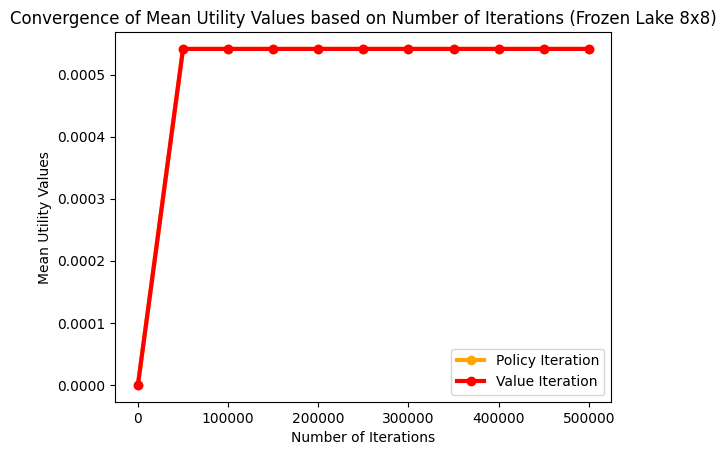

In [64]:
"""
Plotting results of Mean V vs Number of Iterations
"""
# Plotting the validation scores
plt.plot(
    n_iters_list,
    mean_v_values_pi,
    color="orange",
    linewidth=3,
    marker='o',
    label = "Policy Iteration"
)

# Plotting the training scores
plt.plot(
    n_iters_list,
    mean_v_values_vi,
    color="red",
    linewidth=3,
    marker='o',
    label = "Value Iteration"
)



# Naming X-Axis
plt.xlabel('Number of Iterations')
# Naming Y-Axis
plt.ylabel('Mean Utility Values')
# Naming Title
plt.title("Convergence of Mean Utility Values based on Number of Iterations (Frozen Lake 8x8)")

plt.legend()

plt.show()

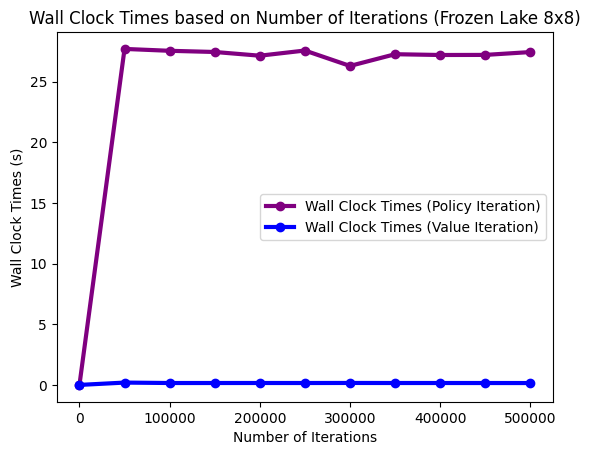

In [65]:
"""
Plotting results of Wall Clock Times
"""
# Plotting the validation scores
plt.plot(
    n_iters_list,
    wall_clock_times_pi,
    color="purple",
    linewidth=3,
    marker='o',
    label = "Wall Clock Times (Policy Iteration)"
)

# Plotting the training scores
plt.plot(
    n_iters_list,
    wall_clock_times_vi,
    color="blue",
    linewidth=3,
    marker='o',
    label = "Wall Clock Times (Value Iteration)"
)



# Naming X-Axis
plt.xlabel('Number of Iterations')
# Naming Y-Axis
plt.ylabel('Wall Clock Times (s)')
# Naming Title
plt.title("Wall Clock Times based on Number of Iterations (Frozen Lake 8x8)")

plt.legend()

plt.show()

In [49]:
# Parameters to environment
is_slippery = True
map_size = 32
proba_frozen = 0.6

seed_everything(seeds[0])

frozen_lake_env_32 = gym.make(
    "FrozenLake-v1",
    is_slippery=is_slippery,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=map_size, p=proba_frozen
    ),
)

frozen_lake_env_32.reset(seed=seeds[0])

(0, {'prob': 1})

In [50]:
"""
From above the best hyperparameters are:
gamma = 0.01
theta = 0.1
n_iters = 1000

Want to perform Value Iteration with these parameters now vs number of iterations.
"""
gamma = 0.5
theta = 1e-10
n_iters_list = [1]
iterations = 100
splits = 500000 / iterations
for i in range(1, iterations + 1):
    n_iters_list.append(int(i * splits))


mean_v_values_vi = []
wall_clock_times_vi = []
    
for n_iters in n_iters_list:
    print(f"Running iteration {n_iters}...")
    t1_start = perf_counter() 
    V, V_track, pi = Planner(frozen_lake_env_32.P).value_iteration(gamma=gamma, n_iters=n_iters, theta=theta)
    t1_stop = perf_counter()
 
    print("Elapsed time: ", t1_stop - t1_start) 
    average_v = np.average(V)
    print(f"Average V value: {average_v}")
    
    mean_v_values_vi.append(average_v)
    wall_clock_times_vi.append(t1_stop - t1_start)


Running iteration 1...
runtime = 0.00 seconds
Elapsed time:  0.00018487499983166344
Average V value: 0.0
Running iteration 5000...
runtime = 0.18 seconds
Elapsed time:  0.17872587499732617
Average V value: 0.0005413445774720215
Running iteration 10000...
runtime = 0.16 seconds
Elapsed time:  0.1608051249968412
Average V value: 0.0005413445774720215
Running iteration 15000...
runtime = 0.16 seconds
Elapsed time:  0.15870875000109663
Average V value: 0.0005413445774720215
Running iteration 20000...
runtime = 0.20 seconds
Elapsed time:  0.20177741699808394
Average V value: 0.0005413445774720215
Running iteration 25000...
runtime = 0.17 seconds
Elapsed time:  0.16653062499972293
Average V value: 0.0005413445774720215
Running iteration 30000...
runtime = 0.17 seconds
Elapsed time:  0.16887033300008625
Average V value: 0.0005413445774720215
Running iteration 35000...
runtime = 0.16 seconds
Elapsed time:  0.1637921670007927
Average V value: 0.0005413445774720215
Running iteration 40000...
run

runtime = 0.16 seconds
Elapsed time:  0.15661575000194716
Average V value: 0.0005413445774720215
Running iteration 335000...
runtime = 0.16 seconds
Elapsed time:  0.15660570799809648
Average V value: 0.0005413445774720215
Running iteration 340000...
runtime = 0.16 seconds
Elapsed time:  0.15648770799816702
Average V value: 0.0005413445774720215
Running iteration 345000...
runtime = 0.16 seconds
Elapsed time:  0.15607691599871032
Average V value: 0.0005413445774720215
Running iteration 350000...
runtime = 0.16 seconds
Elapsed time:  0.15645633399981307
Average V value: 0.0005413445774720215
Running iteration 355000...
runtime = 0.16 seconds
Elapsed time:  0.15852575000099023
Average V value: 0.0005413445774720215
Running iteration 360000...
runtime = 0.16 seconds
Elapsed time:  0.15648337500169873
Average V value: 0.0005413445774720215
Running iteration 365000...
runtime = 0.16 seconds
Elapsed time:  0.1553365829968243
Average V value: 0.0005413445774720215
Running iteration 370000...
r

In [53]:
"""
From above the best hyperparameters are:
gamma = 0.01
theta = 0.1
n_iters = 1000

Want to perform Value Iteration with these parameters now vs number of iterations.
"""
gamma = 0.5
theta = 1e-2
n_iters_list = [1]
iterations = 10
splits = 500000 / iterations
for i in range(1, iterations + 1):
    n_iters_list.append(int(i * splits))


mean_v_values_pi = []
wall_clock_times_pi = []
    
for n_iters in n_iters_list:
    print(f"Running iteration {n_iters}...")
    t1_start = perf_counter() 
    V, V_track, pi = Planner(frozen_lake_env_32.P).policy_iteration(gamma=gamma, n_iters=n_iters, theta=theta)
    t1_stop = perf_counter()
 
    print("Elapsed time: ", t1_stop - t1_start) 
    average_v = np.average(V)
    print(f"Average V value: {average_v}")
    
    mean_v_values_pi.append(average_v)
    wall_clock_times_pi.append(t1_stop - t1_start)


Running iteration 1...
runtime = 0.00 seconds
Elapsed time:  0.00387708299967926
Average V value: 0.0
Running iteration 50000...
runtime = 27.54 seconds
Elapsed time:  27.535133708999638
Average V value: 0.0005413445778989889
Running iteration 100000...
runtime = 27.44 seconds
Elapsed time:  27.444228207998094
Average V value: 0.0005413445778989889
Running iteration 150000...
runtime = 27.44 seconds
Elapsed time:  27.435312458001135
Average V value: 0.0005413445778989889
Running iteration 200000...
runtime = 26.82 seconds
Elapsed time:  26.81787633299973
Average V value: 0.0005413445778989889
Running iteration 250000...
runtime = 27.61 seconds
Elapsed time:  27.605857167000067
Average V value: 0.0005413445778989889
Running iteration 300000...
runtime = 27.18 seconds
Elapsed time:  27.184978542001772
Average V value: 0.0005413445778989889
Running iteration 350000...
runtime = 27.15 seconds
Elapsed time:  27.145826540996495
Average V value: 0.0005413445778989889
Running iteration 400000.

In [57]:
n_iters_list_v = [1]
iterations = 100
splits = 500000 / iterations
for i in range(1, iterations + 1):
    n_iters_list_v.append(int(i * splits))


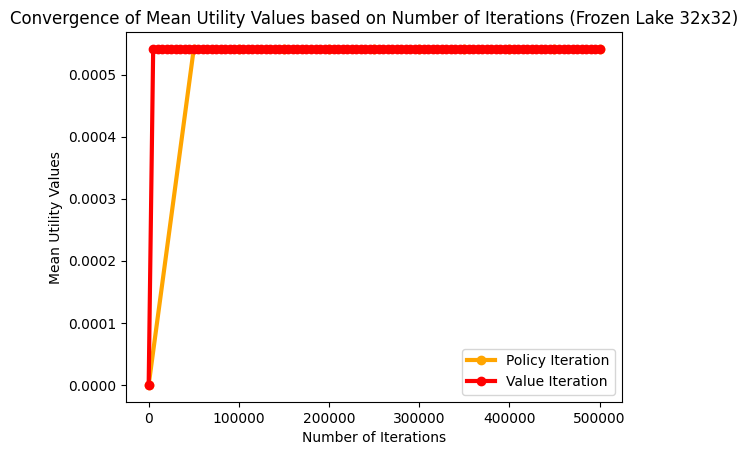

In [58]:
"""
Plotting results of Mean V vs Number of Iterations
"""
# Plotting the validation scores
plt.plot(
    n_iters_list,
    mean_v_values_pi,
    color="orange",
    linewidth=3,
    marker='o',
    label = "Policy Iteration"
)

# Plotting the training scores
plt.plot(
    n_iters_list_v,
    mean_v_values_vi,
    color="red",
    linewidth=3,
    marker='o',
    label = "Value Iteration"
)



# Naming X-Axis
plt.xlabel('Number of Iterations')
# Naming Y-Axis
plt.ylabel('Mean Utility Values')
# Naming Title
plt.title("Convergence of Mean Utility Values based on Number of Iterations (Frozen Lake 32x32)")

plt.legend()

plt.show()

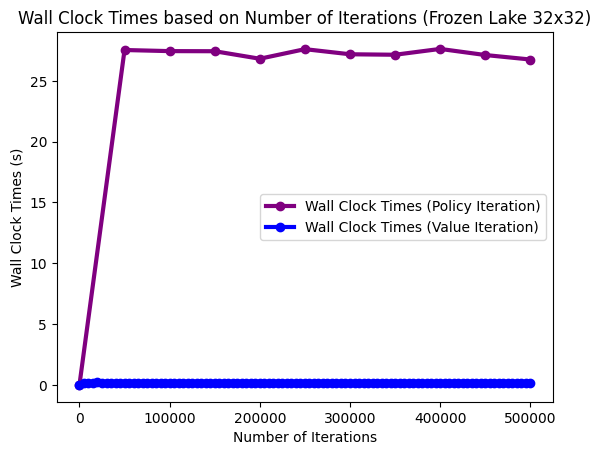

In [59]:
"""
Plotting results of Wall Clock Times
"""
# Plotting the validation scores
plt.plot(
    n_iters_list,
    wall_clock_times_pi,
    color="purple",
    linewidth=3,
    marker='o',
    label = "Wall Clock Times (Policy Iteration)"
)

# Plotting the training scores
plt.plot(
    n_iters_list_v,
    wall_clock_times_vi,
    color="blue",
    linewidth=3,
    marker='o',
    label = "Wall Clock Times (Value Iteration)"
)



# Naming X-Axis
plt.xlabel('Number of Iterations')
# Naming Y-Axis
plt.ylabel('Wall Clock Times (s)')
# Naming Title
plt.title("Wall Clock Times based on Number of Iterations (Frozen Lake 32x32)")

plt.legend()

plt.show()

In [67]:
# Parameters to environment
is_slippery = True
map_size = 20
proba_frozen = 0.45

seed_everything(seeds[0])

frozen_lake_env_v = gym.make(
    "FrozenLake-v1",
    is_slippery=is_slippery,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=map_size, p=proba_frozen
    ),
)

frozen_lake_env_v.reset(seed=seeds[0])

frozen_lake_env_p = gym.make(
    "FrozenLake-v1",
    is_slippery=is_slippery,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=map_size, p=proba_frozen
    ),
)

frozen_lake_env_p.reset(seed=seeds[0])

(0, {'prob': 1})

In [73]:
gamma = 0.5
theta = 1e-10
V_vi, V_track_vi, pi_vi = Planner(frozen_lake_env_v.env.P).value_iteration(gamma=gamma, n_iters=100000, theta=theta)
V_pi, V_track_pi, pi_pi = Planner(frozen_lake_env_p.env.P).policy_iteration(gamma=gamma, n_iters=100000, theta=theta)

runtime = 0.09 seconds
runtime = 2.54 seconds


In [74]:
test_scores_vi = TestEnv.test_env(env=frozen_lake_env_v, render=False, user_input=False, pi=pi_vi)
print(test_scores_vi)
print(np.sum(test_scores_vi))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0


In [76]:
test_scores_pi = TestEnv.test_env(env=frozen_lake_env_p, render=False, user_input=False, pi=pi_pi)
print(test_scores_pi)
print(np.sum(test_scores_pi))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0


In [81]:
pi_vi(1)

0

In [78]:
"""
Policy grid for Value Iteration
"""
player_count = np.arange(0, 20)
dealer_count = np.arange(0, 20)
policy_grid = []

for i in range(len(player_count)):
    policy_grid.append([])
    for j in range(len(dealer_count)):
        pc = player_count[i]
        dc = dealer_count[j]
        policy_grid[i].append(pi_vi((pc, dc)))
        
ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
ax2.set_title(f"Policy: Usable Ace (Policy Iteration)")
ax2.set_xlabel("Player sum")
ax2.set_ylabel("Dealer showing")
ax2.set_xticklabels(range(12, 22))
ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)
legend_elements = [
    Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
    Patch(facecolor="grey", edgecolor="black", label="Stick"),
]
ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))

KeyError: (0, 0)

In [ ]:
"""
Policy grid for Policy Iteration
"""
player_count = np.arange(12, 22)
dealer_count = np.arange(1, 11)
policy_grid = []

for i in range(len(player_count)):
    policy_grid.append([])
    for j in range(len(dealer_count)):
        pc = player_count[i]
        dc = dealer_count[j]
        res = black_jack_p.convert_state_obs((pc, dc, True), False)
        policy_grid[i].append(pi_pi(res))
        
ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
ax2.set_title(f"Policy: Usable Ace (Policy Iteration)")
ax2.set_xlabel("Player sum")
ax2.set_ylabel("Dealer showing")
ax2.set_xticklabels(range(12, 22))
ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)
legend_elements = [
    Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
    Patch(facecolor="grey", edgecolor="black", label="Stick"),
]
ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))

In [83]:
from pathlib import Path
from typing import NamedTuple

In [159]:
class Params(NamedTuple):
    total_episodes: int  # Total episodes
    learning_rate: float  # Learning rate
    gamma: float  # Discounting rate
    epsilon: float  # Exploration probability
    map_size: int  # Number of tiles of one side of the squared environment
    seed: int  # Define a seed so that we get reproducible results
    is_slippery: bool  # If true the player will move in intended direction with probability of 1/3 else will move in either perpendicular direction with equal probability of 1/3 in both directions
    n_runs: int  # Number of runs
    action_size: int  # Number of possible actions
    state_size: int  # Number of possible states
    proba_frozen: float  # Probability that a tile is frozen
    savefig_folder: Path  # Root folder where plots are saved


params = Params(
    total_episodes=10000,
    learning_rate=0.8,
    gamma=0.95,
    epsilon=0.1,
    map_size=12,
    seed=seeds[0],
    is_slippery=True,
    n_runs=20,
    action_size=None,
    state_size=None,
    proba_frozen=0.8,
    savefig_folder=Path("images/"),
)
params

# Set the seed
rng = np.random.default_rng(params.seed)
np.random.seed(params.seed)

# Create the figure folder if it doesn't exists
params.savefig_folder.mkdir(parents=True, exist_ok=True)

In [160]:
frozen_lake_env = gym.make(
    "FrozenLake-v1",
    is_slippery=params.is_slippery,
    render_mode="rgb_array",
    desc=generate_random_map(
        size=params.map_size, p=params.proba_frozen
    ),
)

In [161]:
params = params._replace(action_size=frozen_lake_env.action_space.n)
params = params._replace(state_size=frozen_lake_env.observation_space.n)
print(f"Action size: {params.action_size}")
print(f"State size: {params.state_size}")


class Qlearning:
    def __init__(self, learning_rate, gamma, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.reset_qtable()

        
    def update(self, state, action, reward, new_state):
        """Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]"""
        delta = (
            reward
            + self.gamma * np.max(self.qtable[new_state, :])
            - self.qtable[state, action]
        )
        q_update = self.qtable[state, action] + self.learning_rate * delta
        return q_update

    def reset_qtable(self):
        """Reset the Q-table."""
        self.qtable = np.zeros((self.state_size, self.action_size))


class EpsilonGreedy:
    def __init__(self, epsilon):
        self.epsilon = epsilon

    def choose_action(self, action_space, state, qtable):
        """Choose an action `a` in the current world state (s)."""
        # First we randomize a number
        explor_exploit_tradeoff = rng.uniform(0, 1)

        # Exploration
        if explor_exploit_tradeoff < self.epsilon:
            action = action_space.sample()

        # Exploitation (taking the biggest Q-value for this state)
        else:
            # Break ties randomly
            # If all actions are the same for this state we choose a random one
            # (otherwise `np.argmax()` would always take the first one)
            if np.all(qtable[state, :]) == qtable[state, 0]:
                action = action_space.sample()
            else:
                action = np.argmax(qtable[state, :])
        return action

Action size: 4
State size: 144


In [162]:
learner = Qlearning(
    learning_rate=params.learning_rate,
    gamma=params.gamma,
    state_size=params.state_size,
    action_size=params.action_size,
)
explorer = EpsilonGreedy(
    epsilon=params.epsilon,
)

In [163]:
def run_env():
    rewards = np.zeros((params.total_episodes, params.n_runs))
    steps = np.zeros((params.total_episodes, params.n_runs))
    episodes = np.arange(params.total_episodes)
    qtables = np.zeros((params.n_runs, params.state_size, params.action_size))
    all_states = []
    all_actions = []

    for run in range(params.n_runs):  # Run several times to account for stochasticity
        learner.reset_qtable()  # Reset the Q-table between runs

        for episode in tqdm(
            episodes, desc=f"Run {run}/{params.n_runs} - Episodes", leave=False
        ):
            state = env.reset(seed=params.seed)[0]  # Reset the environment
            step = 0
            done = False
            total_rewards = 0

            while not done:
                action = explorer.choose_action(
                    action_space=env.action_space, state=state, qtable=learner.qtable
                )

                # Log all states and actions
                all_states.append(state)
                all_actions.append(action)

                # Take the action (a) and observe the outcome state(s') and reward (r)
                new_state, reward, terminated, truncated, info = env.step(action)

                done = terminated or truncated

                learner.qtable[state, action] = learner.update(
                    state, action, reward, new_state
                )

                total_rewards += reward
                step += 1

                # Our new state is state
                state = new_state

            # Log all rewards and steps
            rewards[episode, run] = total_rewards
            steps[episode, run] = step
        qtables[run, :, :] = learner.qtable

    return rewards, steps, episodes, qtables, all_states, all_actions

In [164]:
def postprocess(episodes, params, rewards, steps, map_size):
    """Convert the results of the simulation in dataframes."""
    res = pd.DataFrame(
        data={
            "Episodes": np.tile(episodes, reps=params.n_runs),
            "Rewards": rewards.flatten(),
            "Steps": steps.flatten(),
        }
    )
    res["cum_rewards"] = rewards.cumsum(axis=0).flatten(order="F")
    res["map_size"] = np.repeat(f"{map_size}x{map_size}", res.shape[0])

    st = pd.DataFrame(data={"Episodes": episodes, "Steps": steps.mean(axis=1)})
    st["map_size"] = np.repeat(f"{map_size}x{map_size}", st.shape[0])
    return res, st

In [165]:
def qtable_directions_map(qtable, map_size):
    """Get the best learned action & map it to arrows."""
    qtable_val_max = qtable.max(axis=1).reshape(map_size, map_size)
    qtable_best_action = np.argmax(qtable, axis=1).reshape(map_size, map_size)
    print(qtable_best_action)
    directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    qtable_directions = np.empty(qtable_best_action.flatten().shape, dtype=str)
    eps = np.finfo(float).eps  # Minimum float number on the machine
    for idx, val in enumerate(qtable_best_action.flatten()):
        if qtable_val_max.flatten()[idx] > eps:
            # Assign an arrow only if a minimal Q-value has been learned as best action
            # otherwise since 0 is a direction, it also gets mapped on the tiles where
            # it didn't actually learn anything
            qtable_directions[idx] = directions[val]
    qtable_directions = qtable_directions.reshape(map_size, map_size)
    return qtable_val_max, qtable_directions

In [166]:
def plot_q_values_map(qtable, env, map_size):
    """Plot the last frame of the simulation and the policy learned."""
    qtable_val_max, qtable_directions = qtable_directions_map(qtable, map_size)

    # Plot the last frame
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    ax[0].imshow(env.render())
    ax[0].axis("off")
    ax[0].set_title("Last frame")

    # Plot the policy
    sns.heatmap(
        qtable_val_max,
        annot=qtable_directions,
        fmt="",
        ax=ax[1],
        cmap=sns.color_palette("Blues", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
        xticklabels=[],
        yticklabels=[],
        annot_kws={"fontsize": "xx-large"},
    ).set(title="Learned Q-values\nArrows represent best action")
    for _, spine in ax[1].spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.7)
        spine.set_color("black")
    img_title = f"frozenlake_q_values_{map_size}x{map_size}.png"
    fig.savefig(params.savefig_folder / img_title, bbox_inches="tight")
    plt.show()

In [167]:
def plot_states_actions_distribution(states, actions, map_size):
    """Plot the distributions of states and actions."""
    labels = {"LEFT": 0, "DOWN": 1, "RIGHT": 2, "UP": 3}

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    sns.histplot(data=states, ax=ax[0], kde=True)
    ax[0].set_title("States")
    sns.histplot(data=actions, ax=ax[1])
    ax[1].set_xticks(list(labels.values()), labels=labels.keys())
    ax[1].set_title("Actions")
    fig.tight_layout()
    img_title = f"frozenlake_states_actions_distrib_{map_size}x{map_size}.png"
    fig.savefig(params.savefig_folder / img_title, bbox_inches="tight")
    plt.show()

Map size: 20x20


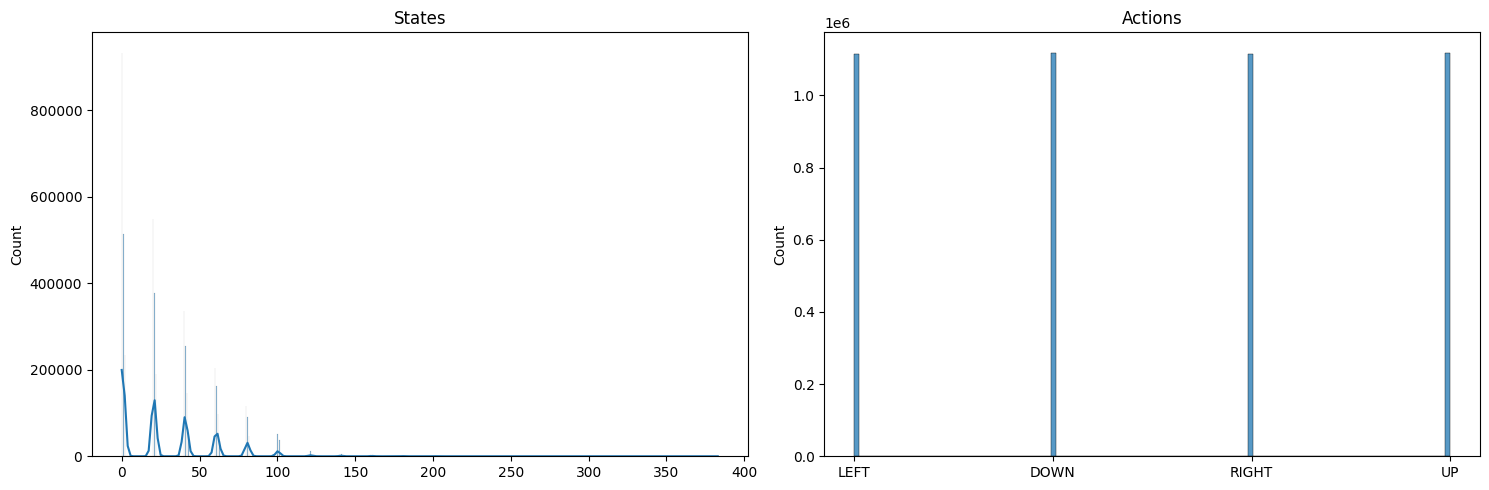

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


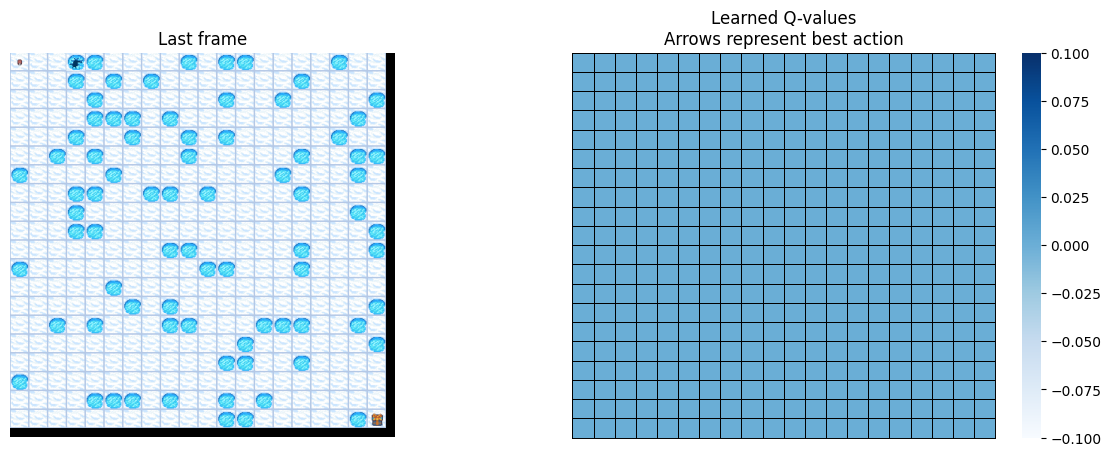

In [168]:
map_sizes = [20]
res_all = pd.DataFrame()
st_all = pd.DataFrame()

for map_size in map_sizes:
    env = gym.make(
        "FrozenLake-v1",
        is_slippery=params.is_slippery,
        render_mode="rgb_array",
        desc=generate_random_map(
            size=map_size, p=params.proba_frozen
        ),
    )

    params = params._replace(action_size=env.action_space.n)
    params = params._replace(state_size=env.observation_space.n)
    env.action_space.seed(
        params.seed
    )  # Set the seed to get reproducible results when sampling the action space
    learner = Qlearning(
        learning_rate=params.learning_rate,
        gamma=params.gamma,
        state_size=params.state_size,
        action_size=params.action_size,
    )
    explorer = EpsilonGreedy(
        epsilon=params.epsilon,
    )

    print(f"Map size: {map_size}x{map_size}")
    rewards, steps, episodes, qtables, all_states, all_actions = run_env()

    # Save the results in dataframes
    res, st = postprocess(episodes, params, rewards, steps, map_size)
    res_all = pd.concat([res_all, res])
    st_all = pd.concat([st_all, st])
    qtable = qtables.mean(axis=0)  # Average the Q-table between runs

    plot_states_actions_distribution(
        states=all_states, actions=all_actions, map_size=map_size
    )  # Sanity check
    plot_q_values_map(qtable, env, map_size)

    env.close()

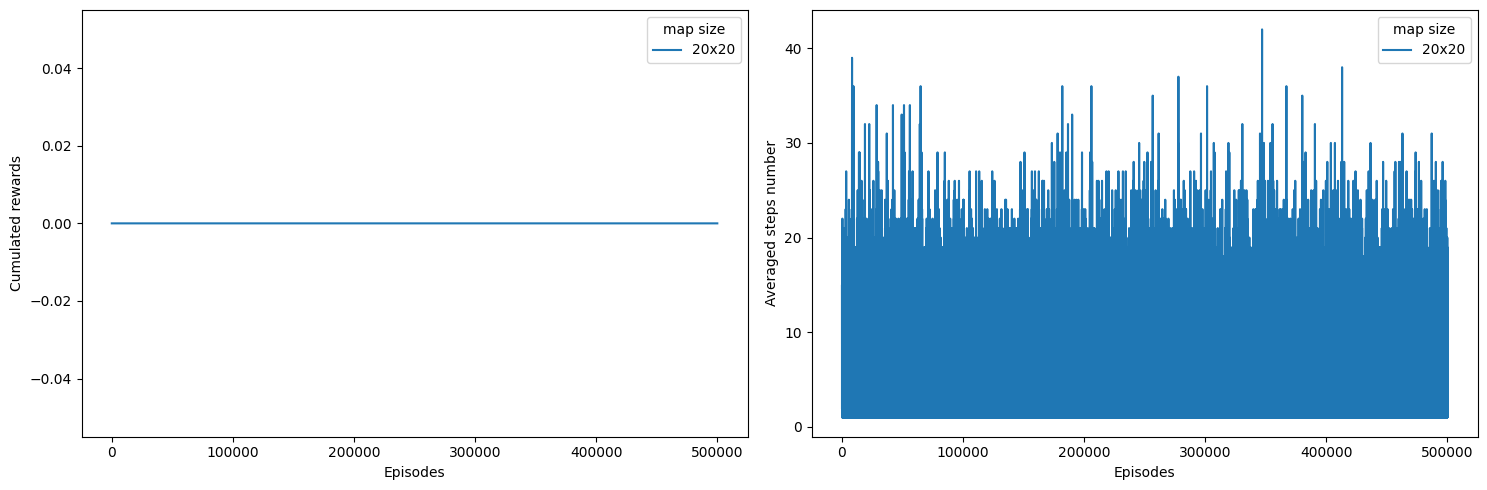

In [148]:
def plot_steps_and_rewards(rewards_df, steps_df):
    """Plot the steps and rewards from dataframes."""
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    sns.lineplot(
        data=rewards_df, x="Episodes", y="cum_rewards", hue="map_size", ax=ax[0]
    )
    ax[0].set(ylabel="Cumulated rewards")

    sns.lineplot(data=steps_df, x="Episodes", y="Steps", hue="map_size", ax=ax[1])
    ax[1].set(ylabel="Averaged steps number")

    for axi in ax:
        axi.legend(title="map size")
    fig.tight_layout()
    img_title = "frozenlake_steps_and_rewards.png"
    fig.savefig(params.savefig_folder / img_title, bbox_inches="tight")
    plt.show()

plot_steps_and_rewards(res_all, st_all)